In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def halfMoon(n,r,d,w):
    """half moon data, creates points the two dimensional Euclidean vector space which either belong to the upper or to the lower half of a moon;
       the lower half is shifted horizntally and vertically; 
       [n] ... number of points to be created in each half
       [r] ... radius of the moon
       [d] ... vertical shifting of the lower half
       [w] ... width of the moon (controls also the horizontal shifting of the lower half)

       returns a tupel (p,t) whereby
       [p] is a two dimensional numpy array with 2*n rows and 2 columns, p[j,] is the j-th created point
       [t] is a one dimensinal numpy array with t[j] = 1.0 and t[j] = 0.0 if the j-th created point belongs to the upper half and to
           the lower half of the moon, respectively"""
    p = np.zeros((2*n,2))
    t = np.zeros(2*n)

    rmin = r - w/2
    rmax = r + w/2
    xmin = -rmax
    xmax =  rmax

    for k in range(0,n):
        x = xmin + (xmax - xmin) * np.random.uniform(0, 1)
        if math.fabs(x) < rmin:
            ymin = math.sqrt(math.pow(rmin,2.0) - math.pow(x,2.0))
        else:
            ymin = 0.0
        ymax = math.sqrt(math.pow(rmax,2.0) - math.pow(x,2.0))
        y = ymin + (ymax - ymin) * np.random.uniform(0, 1)
        p[2*k,0] = x
        p[2*k,1] = y
        t[2*k] = 1.0
        p[2*k+1,0] = x + r
        p[2*k+1,1] = -y - d
        t[2*k+1] = 0.0

    idx = np.random.permutation(2*n)
    pRnd = np.zeros((2*n,2))
    tRnd = np.zeros(2*n)
    for k in range(0,2*n):
        pRnd[k,] = p[idx[k],]
        tRnd[k] = t[idx[k]]
    return (pRnd,tRnd)

In [24]:
def plotHalfMoon(p,t):
    """plots half moon data"""
    xPlus = []
    yPlus = []
    xMinus = []
    yMinus = []
    for k in range(0,p.shape[0]):
        if t[k] > 0.5:
            xPlus.append(p[k,0])
            yPlus.append(p[k,1])
        else:
            xMinus.append(p[k,0])
            yMinus.append(p[k,1])
    plt.scatter(xPlus, yPlus, color='red', marker='x')
    plt.scatter(xMinus, yMinus, color='blue', marker='x')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [25]:
hm = halfMoon(200, 10, 5, 5)

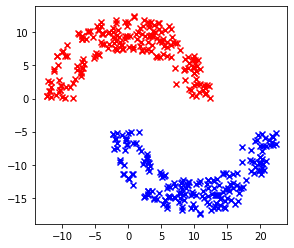

In [26]:
plotHalfMoon(hm[0], hm[1])